In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os, pickle
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util

import R2h_module
import imp
imp.reload(R2h_module)

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [3]:
dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "C Fe Pb".split()}

dfs_mc['D'] =  root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")
#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

In [4]:
dfs_pair = {"MC_" + A: R2h_module.applyCuts(dfs_mc[A],nomCuts=True) for A in "D C Fe Pb".split()}

Entries before cut  508232
Q2>1.0 and Q2<4.0 508232  (100.00  %)
0.2<h1_p<5.0  508232  (100.00  %)
inelasticity < 0.85 508232  (100.00  %)
h1_pid = pions (trigger) 508232  (100.00  %)
2.2 < nu <4.2 508232  (100.00  %)
10< h1_th 508232  (100.00  %)
Theta/P fiducial region selected for trigger hadron 508232  (100.00  %)
Nom cuts for the trigger applied 243989  (48.01  %)
Entries before cut  482681
Q2>1.0 and Q2<4.0 482681  (100.00  %)
0.2<h1_p<5.0  482681  (100.00  %)
inelasticity < 0.85 482681  (100.00  %)
h1_pid = pions (trigger) 482681  (100.00  %)
2.2 < nu <4.2 482681  (100.00  %)
10< h1_th 482681  (100.00  %)
Theta/P fiducial region selected for trigger hadron 482681  (100.00  %)
Nom cuts for the trigger applied 233985  (48.48  %)
Entries before cut  208328
Q2>1.0 and Q2<4.0 208328  (100.00  %)
0.2<h1_p<5.0  208328  (100.00  %)
inelasticity < 0.85 208328  (100.00  %)
h1_pid = pions (trigger) 208328  (100.00  %)
2.2 < nu <4.2 208328  (100.00  %)
10< h1_th 208328  (100.00  %)
Theta/P 

In [51]:
dfs_trigger = {"MC_" + A: R2h_module.applyCuts(dfs_mc[A],nomCuts=True) for A in "D C Fe Pb".split()}

Entries before cut  508232
Q2>1.0 and Q2<4.0 508232  (100.00  %)
0.2<h1_p<5.0  508232  (100.00  %)
inelasticity < 0.85 508232  (100.00  %)
h1_pid = pions (trigger) 508232  (100.00  %)
2.2 < nu <4.2 508232  (100.00  %)
10< h1_th 508232  (100.00  %)
Theta/P fiducial region selected for trigger hadron 508232  (100.00  %)
Nom cuts for the trigger applied 243989  (48.01  %)
Entries before cut  482681
Q2>1.0 and Q2<4.0 482681  (100.00  %)
0.2<h1_p<5.0  482681  (100.00  %)
inelasticity < 0.85 482681  (100.00  %)
h1_pid = pions (trigger) 482681  (100.00  %)
2.2 < nu <4.2 482681  (100.00  %)
10< h1_th 482681  (100.00  %)
Theta/P fiducial region selected for trigger hadron 482681  (100.00  %)
Nom cuts for the trigger applied 233985  (48.48  %)
Entries before cut  208328
Q2>1.0 and Q2<4.0 208328  (100.00  %)
0.2<h1_p<5.0  208328  (100.00  %)
inelasticity < 0.85 208328  (100.00  %)
h1_pid = pions (trigger) 208328  (100.00  %)
2.2 < nu <4.2 208328  (100.00  %)
10< h1_th 208328  (100.00  %)
Theta/P 

In [5]:
for c in dfs_pair['MC_D'].columns:
    #if "h1_" in c:
    print(c)

dphi
dphi_lab
drap
h1_z
h2_z
h1_cm_pt
h2_cm_pt
h1_xf
h2_xf
h1_rap
ycm
h2_rap
h1_pid
h2_pid
h1_cm_ph
h2_cm_ph
h1_cm_th
h2_cm_th
pair_mass
pair_pt
mx_eh1h2x
mx_eh1x
mx_eh2x
t
Q2
nu
W
e_px
e_py
e_pz
e_p
e_ph
e_th
SampFracEl25
SampFracEl20
TargTypeSM
TargType
x
u
h1_ph
h1_th
h2_ph
h2_th
h1_deltaZ
h2_deltaZ
h1_Nphe
h2_Nphe
h1_Sector
h2_Sector
h1_FidCut
h2_FidCut
h1_FidCutPiPlus
h2_FidCutPiPlus
h1_Chi2CC
h2_Chi2CC
h1_StatCC
h2_StatCC
h1_Betta
h2_Betta
h1_T4
h2_T4
evnt
pass_recon
dphi_truth
dphi_lab_truth
drap_truth
h1_truth_z
h2_truth_z
h1_truth_cm_pt
h2_truth_cm_pt
h1_truth_xf
h2_truth_xf
h1_truth_rap
ycm_truth
h2_truth_rap
h1_truth_pid
h2_truth_pid
h1_truth_cm_ph
h2_truth_cm_ph
h1_truth_cm_th
h2_truth_cm_th
pair_mass_truth
pair_pt_truth
mx_eh1h2x_truth
mx_eh1x_truth
mx_eh2x_truth
t_truth
Q2_truth
nu_truth
W_truth
x_truth
u_truth
h1_truth_ph
h1_truth_th
h2_truth_ph
h2_truth_th
e_truth_px
e_truth_py
e_truth_pz
e_truth_p
e_truth_ph
e_truth_th
inelasticity
diff_phi_cm
pi
h1_e
h2_e
h2_mass
h1_p

53448 628


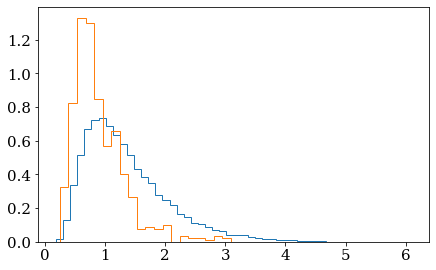

In [6]:
othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#othercuts += " and drap<1 and dphi< 1"

pass_ = dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==211" + " and "+ othercuts)
fail =dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==2212" + " and "+ othercuts)

print(len(pass_), len(fail))

#pass_ = pass_[:500]
#plt.scatter(pass_.h1_p, pass_.h1_th,3)
#plt.scatter(fail.h1_p, fail.h1_th,3)
#print(pass_.eval("e_th"))
testvars = []
#testvars.append("h1_cm_pt/sqrt(Q2)")
#testvars.append("(sqrt(h1_p**2+.938**2)+h2_p)/nu")
#testvars.append("sqrt(h1_p**2-h1_cm_pt**2)/sqrt(Q2+nu**2)")

#testvars.append("(h1_e*nu-sqrt(h1_p**2-h1_cm_pt**2)*sqrt(Q2+nu**2))/Q2")
testvars.append("h1_cm_pt/h2_cm_pt")
for var in testvars:
    
    plt.hist(pass_.eval(var), bins=50, density=True, histtype='step')
    plt.hist(fail.eval(var), bins=20, density=True, histtype='step')
    plt.show()

0.020495051329782334
0.011537681773780341
0.0071142894004460255
{321, 2212, -211, -9999, -11}
drap>0.5 and drap<1.5 [ 53  29   7   7  15  22  75 361] [ 51  28   6   0   5   8  21 193] [  1   1   1   6  10  13  54 167]
h1_cm_pt>0.4 and h1_cm_pt<0.6 [ 25  14   1   7   7  16  37 220] [ 24  13   1   1   4   6  14 172] [ 1  1  0  6  3 10 23 48]
h1_cm_pt>0.6 and h1_cm_pt<1.0 [ 10   1   2   1   4  20  43 206] [10  1  1  0  2  8  9 71] [  0   0   1   1   2  12  33 134]


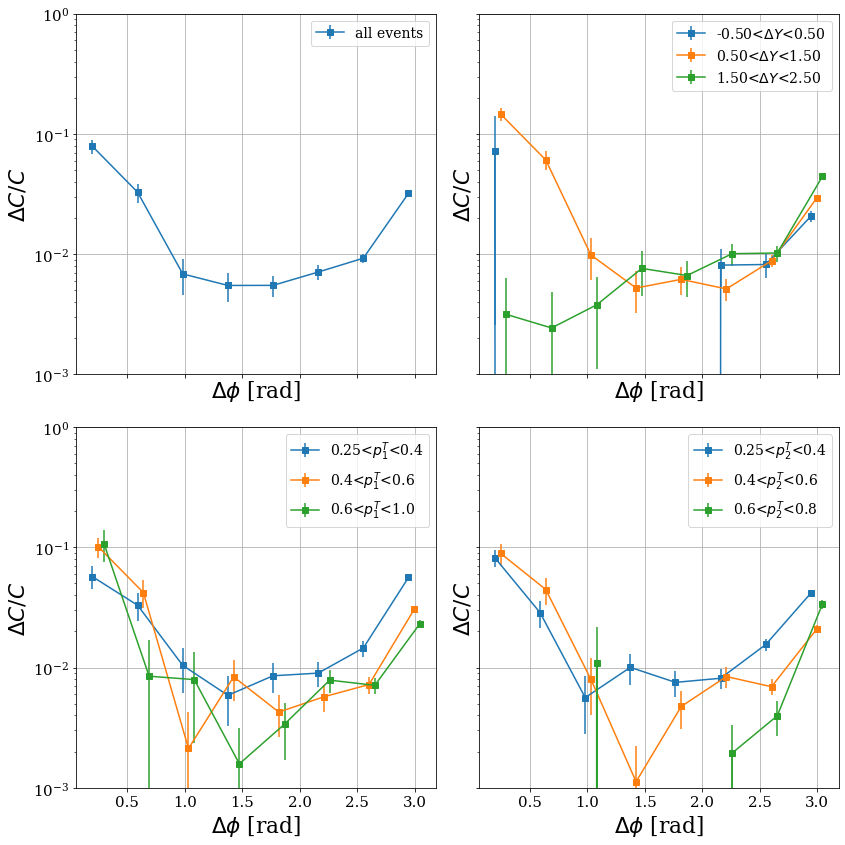

In [32]:
syst_from_misid={}
syst_from_misid_ratios={}

misid_p_rate={}
misid_K_rate={}

keys = "all dY pT1 pT2".split()
for A in "D".split():
    j = 0
    fig, axs=plt.subplots(2,2, figsize=(12, 12), sharex = True, sharey=True)
    df = dfs_pair[f'MC_{A}']

    othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
    othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
    othercuts += " and h1_cm_pt<2"
    othercuts += " and h2_cm_pt<2"
    ppimass="sqrt((sqrt(h1_p**2+.938272**2)+sqrt(h2_p**2+.139570**2))**2"\
       + "-h1_p**2-h2_p**2-2*h1_p*h2_p*(cos(pi/180*(h1_th))*cos(pi/180*(h2_th))+sin(pi/180*(h1_th))*sin(pi/180*(h2_th))*cos(pi/180*(h1_ph-h2_ph))))"
    #othercuts += f" and {ppimass}>1.2"
    #othercuts += " and h1_cm_pt>h2_p"

    num = df.query(othercuts+" and (h1_truth_pid != 211 or h2_truth_pid != -211) and h1_truth_pid !=-9999 and h1_pid==211 and h2_pid==-211")
    
    h1fail = df.query(othercuts+" and (h1_truth_pid != 211) and h1_pid==211 and h2_pid==-211")
    h2fail = df.query(othercuts+" and (h2_truth_pid != -211) and h1_pid==211 and h2_pid==-211")
    h1fail_p = df.query(othercuts+" and (h1_truth_pid == 2212 or h2_truth_pid == 2212) and h1_pid==211 and h2_pid==-211")
    h1fail_K = df.query(othercuts+" and (abs(h1_truth_pid) == 321 or abs(h2_truth_pid)==321) and h1_pid==211 and h2_pid==-211")
    
    #num = num.query("h1_truth_pid !=-9999")
    
    denom= df.query(othercuts+" and h1_pid==211 and h2_pid==-211 and h1_truth_pid != -9999")
    print(len(h1fail)/len(denom))
    print(len(h1fail_p)/len(denom))
    print(len(h1fail_K)/len(denom))
    print(set(h1fail.h1_truth_pid))

    slice_conds= ["drap==drap"]
    #for i in range(4):
    #    slice_conds.append(f"drap>{0.5*i} and drap<{0.5*(i+1)}")
    drap_slices=(-0.5,0.5, 1.5, 2.5)
    #drap_slices=(0,0.53, 1.4, 2.0)
    for i in range(3):
        slice_conds.append(f"drap>{drap_slices[i]} and drap<{drap_slices[i+1]}")
    
    slice_conds.append(f"h1_cm_pt>0.25 and h1_cm_pt<0.4")
    slice_conds.append(f"h1_cm_pt>0.4 and h1_cm_pt<0.6")
    slice_conds.append(f"h1_cm_pt>0.6 and h1_cm_pt<1.0")    

    slice_conds.append(f"h2_cm_pt>0.25 and h2_cm_pt<0.4")
    slice_conds.append(f"h2_cm_pt>0.4 and h2_cm_pt<0.6")
    slice_conds.append(f"h2_cm_pt>0.6 and h2_cm_pt<0.8")    

    #labels = "all events;0.0<$\Delta Y$<0.5;0.5<$\Delta Y$<1.0;1.0<$\Delta Y$<1.5;1.5<$\Delta Y$<2.0;"
    labels = "all events;"
    labels+= "".join([f"{drap_slices[i]:.2f}<$\Delta Y$<{drap_slices[i+1]:.2f};" for i in range(len(drap_slices)-1)])
    labels+= "0.25<$p^T_1$<0.4;0.4<$p^T_1$<0.6;0.6<$p^T_1$<1.0;"
    labels+= "0.25<$p^T_2$<0.4;0.4<$p^T_2$<0.6;0.6<$p^T_2$<0.8"
    labels= labels.split(";")

    shift=0
    for i, (slice_cond, label) in enumerate(zip(slice_conds, labels)):
        plt.sca(axs[j//2][j%2])
        n, x = np.histogram(num.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        n_K,_ = np.histogram(h1fail_K.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        n_p,_ = np.histogram(h1fail_p.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        #print(n_K/n_p)
        h1f,x = np.histogram(h1fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        h2f,x = np.histogram(h2fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        
        
        d, x = np.histogram(denom.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        
        
        if(max(n/d)>0.1):
            print(slice_cond, n, n_p, n_K)
        #n=n+0.5*(n==0)
        
        x= (x[1:]+x[:-1])/2+shift
        plt.errorbar(x, n/d, np.sqrt(n*(d-n)/d**3), label=label, marker='s')
        #plt.plot(x, h2f/d, linestyle='--')
        #print(h1f/n)
        if keys[j] not in syst_from_misid:
            syst_from_misid[keys[j]] = []
            syst_from_misid_ratios[keys[j]]=[]
            misid_p_rate[keys[j]] = []
            misid_K_rate[keys[j]]=[]
        syst_from_misid[keys[j]].append(n/d)
        nforR=n_K/2+n_p
        syst_from_misid_ratios[keys[j]].append(nforR/d)
        misid_p_rate[keys[j]].append(n_p/d)
        misid_K_rate[keys[j]].append(n_K/d)
        
        #if i in (0, 4, 7, 10):   
        if i in (0, 3, 6, 9):
            plt.xlabel("$\Delta\phi$ [rad]")
            plt.ylabel("$\Delta C/C$")
            plt.legend(fontsize=14)
            plt.yscale('log')
            plt.grid()
            plt.ylim(1e-3, 1)
            shift=0
            j+=1
        else:
            shift +=0.05
plt.tight_layout()
plt.show()

In [33]:
print(len(dfs_pair['MC_D'].query("h1_pid==211 and h2_pid==-211 and h1_p+h2_p>.9*nu"))/len(dfs_pair['MC_D'].query("h1_pid==211 and h2_pid==-211")))

0.16646461084047876


In [34]:

with open("misid_p_rate.pkl", "wb") as f:
    pickle.dump(misid_p_rate, f, pickle.HIGHEST_PROTOCOL)

with open("misid_K_rate.pkl", "wb") as f:
    pickle.dump(misid_K_rate, f, pickle.HIGHEST_PROTOCOL)

In [35]:
print(syst_from_misid)
with open("syst_from_misid.pkl", "wb") as f:
    pickle.dump(syst_from_misid, f, pickle.HIGHEST_PROTOCOL)

{'all': [array([0.07879656, 0.03271538, 0.00684932, 0.00549218, 0.00549954,
       0.00709677, 0.00925622, 0.03201629])], 'dY': [array([0.07142857, 0.        , 0.        , 0.        , 0.        ,
       0.00810537, 0.00820345, 0.0206859 ]), array([0.14600551, 0.06066946, 0.00983146, 0.00522778, 0.00617284,
       0.00513779, 0.00880799, 0.02924735]), array([0.00315457, 0.00243309, 0.00378788, 0.00761421, 0.00664207,
       0.01008827, 0.01022147, 0.04424614])], 'pT1': [array([0.05698006, 0.03296703, 0.01041667, 0.00587544, 0.00854093,
       0.00899101, 0.01454177, 0.05610473]), array([0.10121457, 0.04204204, 0.00212314, 0.00837321, 0.00426309,
       0.00571633, 0.00722233, 0.03050471]), array([0.10752688, 0.00847458, 0.00793651, 0.00158228, 0.00338409,
       0.00785546, 0.00711332, 0.02322959])], 'pT2': [array([0.08173077, 0.02862595, 0.00562588, 0.01003344, 0.00752941,
       0.00814725, 0.01554889, 0.04160541]), array([0.08898305, 0.04451039, 0.00796813, 0.0011236 , 0.00474777,
  

In [30]:
print(syst_from_misid_ratios)
with open("syst_from_misid_ratio.pkl", "wb") as f:
    pickle.dump(syst_from_misid_ratios, f, pickle.HIGHEST_PROTOCOL)

{'all': [array([0.07593123, 0.03162486, 0.00570776, 0.00295733, 0.00389551,
       0.00490323, 0.00649905, 0.0263024 ])], 'dY': [array([0.11764706, 0.03846154, 0.        , 0.        , 0.        ,
       0.00523865, 0.00549976, 0.01261289]), array([0.16176471, 0.06857855, 0.00895765, 0.00215703, 0.00382409,
       0.00391363, 0.00546594, 0.02091342]), array([0.00341297, 0.00130548, 0.00311203, 0.00534045, 0.00574713,
       0.00677744, 0.00675331, 0.03534582])], 'pT1': [array([0.05270655, 0.03186813, 0.00868056, 0.00293772, 0.00569395,
       0.00624376, 0.01301995, 0.05423457]), array([0.09919028, 0.04054054, 0.00212314, 0.00478469, 0.00334957,
       0.00392997, 0.00497755, 0.02717693]), array([0.10752688, 0.00847458, 0.00595238, 0.00079114, 0.00253807,
       0.00549882, 0.00421836, 0.01556157])], 'pT2': [array([0.078125  , 0.02767176, 0.00492264, 0.00543478, 0.00494118,
       0.00528063, 0.0088048 , 0.02587474]), array([0.08686441, 0.04302671, 0.0059761 , 0.0005618 , 0.00385757,
  

(array([0.0000e+00, 7.9248e+04, 7.5148e+04, 6.6367e+04, 1.6722e+04,
        5.0380e+03, 1.1780e+03, 2.4800e+02, 3.6000e+01, 4.0000e+00]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

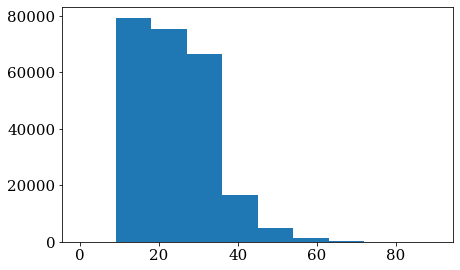

In [31]:
plt.hist(dfs_pair['MC_D'].h1_th,range=(-0,90))

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1

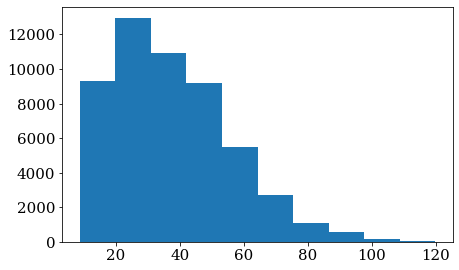

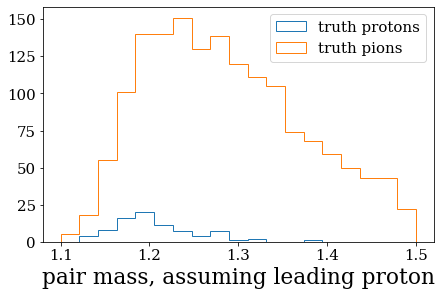

Text(0.5, 0, 'pair mass, assuming leading proton')

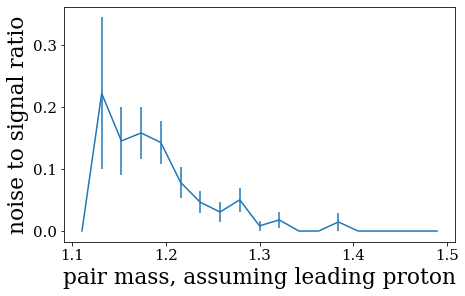

In [25]:
print(list(dfs_pair['MC_D'].columns))

plt.hist(dfs_pair['MC_D'].query("h2_pid==211").h2_th)
plt.show()

var="sqrt((sqrt(h1_p**2+.938272**2)+sqrt(h2_p**2+.139570**2))**2"\
       + "-h1_p**2-h2_p**2-2*h1_p*h2_p*(cos(pi/180*(h1_th))*cos(pi/180*(h2_th))+sin(pi/180*(h1_th))*sin(pi/180*(h2_th))*cos(pi/180*(h1_ph-h2_ph))))"
bins=np.linspace(1.1, 1.5, 20)

xlabel="pair mass, assuming leading proton"
y1,x,_= plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 2212 and h1_pid==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and dphi<pi/4 and h2_cm_pt<3"\
                               + " and drap<2.1 and (h1_p+h2_p)<nu and h2_pid==-211").eval(var), bins=bins,
         histtype='step',label="truth protons")#, density=True)
y2,x,_=plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 211 and h1_pid ==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h1_p>0.35 and dphi<pi/4 and h2_cm_pt<3"\
                               + " and drap<2.1 and (h1_p+h2_p)<nu and h2_pid==-211").eval(var), bins=bins, histtype='step',
               label="truth pions")#, density=True)
plt.legend()
plt.xlabel(xlabel)

plt.show()

plt.errorbar((x[1:]+x[:-1])/2, y1/y2, y1/y2*np.sqrt(1/(y1+(y1==0))+1/(y2+(y2==0))))
plt.ylabel("noise to signal ratio")
plt.xlabel(xlabel)

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1

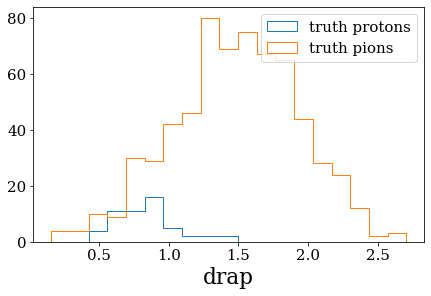

Text(0.5, 0, 'drap')

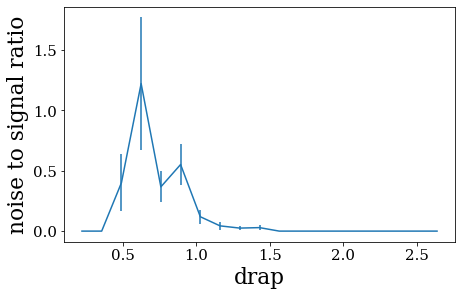

In [66]:
print(list(dfs_pair['MC_D'].columns))

#plt.hist(dfs_pair['MC_D'].query("h2_pid==211").h2_th)
#plt.show()

#var="h1_cm_pt/h2_cm_pt"
var="drap"

bincut=" and dphi<pi/8"
bincut=" and dphi<pi/8"
#bincut=" "

df= dfs_pair["MC_D"].query("h1_pid==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and h2_cm_pt<3"\
                               + f"{bincut} and (h1_p+h2_p)<nu and h1_FidCutPiPlus>0")
bins=np.linspace(np.min(df.eval(var)), np.max(df.eval(var)), 20)

xlabel=var
y1,x,_= plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 2212 and h1_pid==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and h2_cm_pt<3"\
                               + f"{bincut} and (h1_p+h2_p)<nu and h1_FidCutPiPlus>0").eval(var), bins=bins,
         histtype='step',label="truth protons", density=False)
y2,x,_=plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 211 and h1_pid ==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and h2_cm_pt<3"\
                               + f"{bincut} and (h1_p+h2_p)<nu and h1_FidCutPiPlus>0").eval(var), bins=bins, histtype='step',
               label="truth pions", density=False)
plt.legend()
#plt.yscale("log")
plt.xlabel(xlabel)

plt.show()
#plt.yscale('log')
plt.errorbar((x[1:]+x[:-1])/2, y1/y2, y1/(y2+(y2==0))*np.sqrt(1/(y1+(y1==0))+1/(y2+(y2==0))))
plt.ylabel("noise to signal ratio")
plt.xlabel(xlabel)

# resolution study

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 243989  (100.00  %)
2.2 < nu < 4.2 243989  (100.00  %)
secondary hadrons are pions 143170  (58.68  %)
(h1_pid*h2_pid)<0, opposite charge pions 143096  (99.95  %)
kinematic limits for h2_z 142663  (99.70  %)
kinematic limits for dphi 142472  (99.87  %)
kinematic limits for pair_mass 135438  (95.06  %)
leading hadrons are pions 135438  (100.00  %)
0.2<h2_p<5.0 135198  (99.82  %)
0.2<h1_p<5.0 135198  (100.00  %)
10<h2_th 135172  (99.98  %)
Theta/P fiducial region selected for secondary hadron 127633  (94.42  %)
10< h1_th 127633  (100.00  %)
Theta/P fiducial region selected for trigger hadron 127633  (100.00  %)
Nom cuts for the pair applied (pi pi) 115368  (90.39  %)


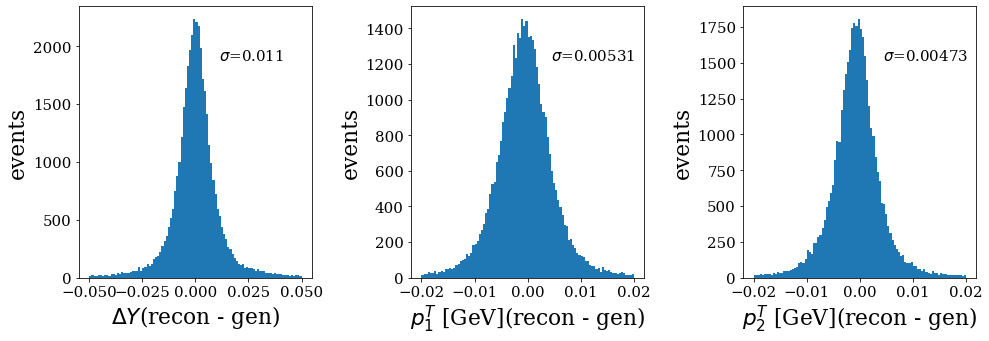

In [16]:
df = R2h_module.applyCutsPair(dfs_pair[f'MC_{A}'], nomCuts=True)

othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"


df = df.query(othercuts+" and h1_pid==211 and h2_pid==-211")

fig,axs = plt.subplots(1,3, figsize=(14, 5))
for i,(expr,xlabel,window) in enumerate(zip(\
            ("drap-drap_truth", "h1_cm_pt-h1_truth_cm_pt", "h2_cm_pt-h2_truth_cm_pt"),
                          ("$\Delta Y$", "$p^T_1$ [GeV]", "$p^T_2$ [GeV]"),
                                       (.05, .02, .02)        
                         )):
    d=df.eval(expr)
    plt.sca(axs[i])
    plt.hist(d, bins=100, range=(-window, window))
    plt.xlabel(xlabel+ "(recon - gen)")
    plt.ylabel("events")
    sigma = np.std(d[(d>-window) & (d<window)])
    plt.text(0.6, 0.8, f"$\sigma$={sigma:.3}", transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


# Null-result test

In [47]:
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")


In [53]:
def get_values(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins_data=8,
              addCuts=None, addCutsTrig=None, divideByMix=False, sliceNh=False):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    
    data=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=0
    pid=211
    
    for k in range(len(slicebins)-1):
        data.append({})
        slice_range=slicebins[k:k+2]

        integral_data_D = 0
        data_D=None
        stat_D=None
        
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
            #q += " and h1_p<2.7"
            #q+= " and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.3 and h2_cm_pt>0.3"
            if usePRLcuts:
                #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                #so we need this in order to make the comparison
                q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 

            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set = "D_Pb" if A=="D" and usePRLcuts else A
            #which_set=A

            bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins_data+1)

            N2, x = np.histogram(dfs_pair["MC_"+which_set].query(q)['dphi'], bins=bins)
            #if usePRLcuts:
            #    q = "h2_z>0.05 and h1_z>0.5"
            #N2mix, x = np.histogram(dfs_mixed["D" if usePRLcuts else A].query(q)['dphi'], bins=bins)

            #M_alt = mix_corr_alt(dfs_mixed[A].query(q))
            
            qtrig = pThetaCuts_trig+f" and h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            if usePRLcuts:
                qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom
            
            if sliceNh:
                qtrig+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger["MC_"+which_set].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            #M = N2mix/(sum(N2mix)/len(N2mix))
            #dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))

            #M_err = np.sqrt(np.mean((M-1)**2))/2
            #print((A,pid,k),"estimated syst error from event mixing",  M_err)
            #if divideByMix:
            #    C = S/M
            #    dCstat = dSstat/M
            #else :
            C=S
            dCstat = dSstat
            


            if A=="D" or "D_" in A:  
                integral_data_D=sum(C)*dx*2

            dCsyst = C*systPct/100
            C/=integral_data_D
            dCstat/=integral_data_D
            dCsyst/=integral_data_D

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, dSstat=dSstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, dRsyst=R_data*0.0,
                                        N2h=N2, N1=[N1]*len(N2)))
            if "D_" in A:
                continue

        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.2f} < ${slicevartex}$< {slice_range[1]:.2f}"
            
        else :
            sliceinfo[k] = f""
                
    return data, sliceinfo

In [73]:
from scipy.interpolate import make_interp_spline
def make_plots_new(data, sliceinfo, pMin=.350, pT1min=.25, pT2min=.25, filename_tag=None,
                  slice_unit=None, useSpline=False):
    

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    slicevartex = sliceinfo[0].split("<")[1].replace("$","") if len(sliceinfo[0]) != 0 else None
    
    s=(', '+slicevartex) if slicevartex!=None else ''
    #ylabels = {"C":f"$C(\Delta\phi{s})$",
    ylabels = {"C":f"Correlation",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$A/D$ Ratio       "
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "CR"

    height = 18*len(sliceinfo)/4
    if len(sliceinfo) == 1:
        height = 7
    width = 14 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if len(sliceinfo) == 1:
        #figs["SM"], (axs["S"],axs["M"]) = plt.subplots(len(sliceinfo), 2, 
        #       figsize=(width,height),sharey='col', sharex='all')
        figs["CR"], (axs["C"],axs["R"]) = plt.subplots(2,1, 
               figsize=(8,7*1.25),sharey='row', sharex='all', 
                                                       gridspec_kw=dict(height_ratios=(10,2.5)))   
        for key in keys:
            axs[key] = [axs[key]]
    else:
        #figs["SM"], ax = plt.subplots(len(sliceinfo), 2, 
        #       figsize=(width,height),sharey='col', sharex='all')
        #axs["S"] = [ax[k][0] for k in range(len(ax))]
        #axs["M"] = [ax[k][1] for k in range(len(ax))]
        figs["CR"], ax = plt.subplots(2,len(sliceinfo), 
               figsize=(16,7*1.25), sharex='all', sharey='none',
                                     gridspec_kw=dict(height_ratios=[10,2.5]))   
        axs["C"] = [ax[0][k] for k in range(len(sliceinfo))]
        axs["R"] = [ax[1][k] for k in range(len(sliceinfo))]
    
    artists = []
    maxC=0.05
    maxR=0.05
    fontsize=18
    for ax in axs['C']+axs['R']:
        ax.tick_params(axis='both', labelsize=fontsize)
    for k in range(len(sliceinfo)):
        
        for key in "CR":    
            #if (key in "SM" and k == len(sliceinfo)-1) or key == "R":
            #    axs[key][k].set_xlabel("$\\Delta\phi$ [rad]", fontsize=fontsize)
            axs[key][k].set_ylabel(ylabels[key], fontsize=fontsize)
        linestyles='- -- : -. --'.split()
        colors='tab:red tab:blue tab:orange tab:green k'.split()
        markers='*vos*'
        
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            
            #which_set=A
            x= data[k][A].phi
            shift = 0.1*(x[2]-x[1])*(i-1.5)
            
            #S = data[k][A].S
            #M = data[k][A].M
            C = data[k][A].C
            R_data = data[k][A].R
            #dSstat = data[k][A].dSstat
            #dMstat = data[k][A].dMstat
            dCstat = data[k][A].dCstat
            dCsyst = data[k][A].dCsyst
            dRstat = data[k][A].dRstat
            dRsyst = data[k][A].dRsyst
            
            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3, ms=4)

            #axs['S'][k].errorbar(x+shift, S,dSstat, **arg, label=A)
            #axs['S'][k].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

            #axs['M'][k].errorbar(x+shift, M,dMstat, **arg, label=A)
            #axs['M'][k].errorbar(2*np.pi-x+shift, M, dMstat, **arg)



            artists.append(axs['C'][k].errorbar(x+shift, C,dCstat, **arg, label=A))
            axs['C'][k].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
            arg['capsize']=0
            dCtot = np.hypot(dCstat, dCsyst)
            axs['C'][k].errorbar(x+shift,C, dCtot, **arg)
            axs['C'][k].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
            if A!="D":
                arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3, ms=4)
                axs['R'][k].errorbar(x+shift,R_data, 
                                    dRstat,
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    dRstat,
                                    **arg)
                arg['capsize']=0
                axs['R'][k].errorbar(x+shift,R_data, 
                                    np.hypot(dRstat, dRsyst),
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    np.hypot(dRstat, dRsyst),
                                    **arg)
                
        
        for key in keys:
            
            cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
            #if key == "R" and len(sliceinfo)==1:
            #    axs[key][k].text(0.4,0.6 , cuts_txt,
            #                    transform=axs[key][k].transAxes)
            if key == "C" and len(sliceinfo)==1:
                axs[key][k].text(0.05,0.4, cuts_txt,
                                transform=axs[key][k].transAxes,
                                horizontalalignment='left', fontsize=fontsize)
            elif key == "C" and k==2 and len(sliceinfo)!=1:
                axs[key][k].text(0.07,0.65, cuts_txt,
                                transform=axs[key][k].transAxes, fontsize=fontsize)

            #else :
            #    axs[key][k][j].text(0.05,0.1, cuts_txt
            #                transform=axs[key][k][j].transAxes)
            #if len(sliceinfo)!=1 and key in "SM":    
            #    axs[key][k].text(0.5,0.9,
            #                   sliceinfo[k],
            #                  transform=axs[key][k].transAxes,
            #                     horizontalalignment='center',
            #                     fontsize=fontsize)
            if len(sliceinfo)!=1 and key == "C": 
                axs[key][k].set_title(sliceinfo[k].replace("-", "$-$") + \
                                      ((" "+slice_unit) if slice_unit is not None else ""),
                                 fontsize=fontsize)
            if k ==0: 
                if key == "C":
                    a=artists
                    l=[aa.get_label() for aa in a]
                    #split legend, with data on one side and GiBUU on the other
                    plt.sca(axs[key][(k+1) if len(sliceinfo)!=1 else k])
                    legend2 = plt.legend(a[4:], l[4:], framealpha=0,
                                loc='upper left' if len(sliceinfo)!=1 else "upper right",
                                         ncol=1 if len(sliceinfo) != 3 else 2, 
                                         fontsize=fontsize, 
                                         columnspacing=0.8)
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1 if len(sliceinfo) != 3 else 2, fontsize=fontsize)
                    axs[key][(k+1) if len(sliceinfo)!=1 else k].add_artist(legend2)
                #elif key == "S": 
                #    #a=[artists[i] for i in [0,2,4,6]]
                #    a=[artists[i] for i in [0,1,2,3]]
                #    l=[aa.get_label() for aa in a]
                #    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                #                       loc='upper left',ncol=1)
            
            axs[key][k].set_xlim(0,2*np.pi)
    for ii, ax in enumerate(axs['C']):
        ax.set_ylim(0, 0.6+0.15*ii if "Delta" not in sliceinfo[0] else 0.8-0.05*ii)
    for ax in axs['R']:
        ax.set_ylim(0.6, 1.4)
        ax.axhline(1, color='0.5', alpha=0.7, linestyle=':')
        ax.set_xlabel("$\Delta\phi$ [rad]", fontsize=fontsize)
    for key in "CR".split():
        #fig.suptitle(suptitle)
        figs[key].tight_layout()
        #if len(sliceinfo)==1:
        figs['CR'].subplots_adjust(hspace=0) 
        #figs['CR'].subplots_adjust(wspace=0)
        #if filename_tag is not None:
        #    figs[key].savefig(f"images/{key}_{filename_tag}.pdf")
        #    figs[key].savefig(f"images/{key}_{filename_tag}.png")
        figs[key].show()
    #for d in ("/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/",
    #            "/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/"):
    #    figs["CR"].tight_layout()
    #    figs["CR"].savefig(f"{d}/corr_{filename_tag}.pdf")


<ipython-input-73-e29528312791>:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()
<ipython-input-53-aa7dd7611c06>:103: RuntimeWarning: invalid value encountered in true_divide
  dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
/home/sebouh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/sebouh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/sebouh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/sebouh/.local/lib/python3.8/site-packages/numpy/core/_methods

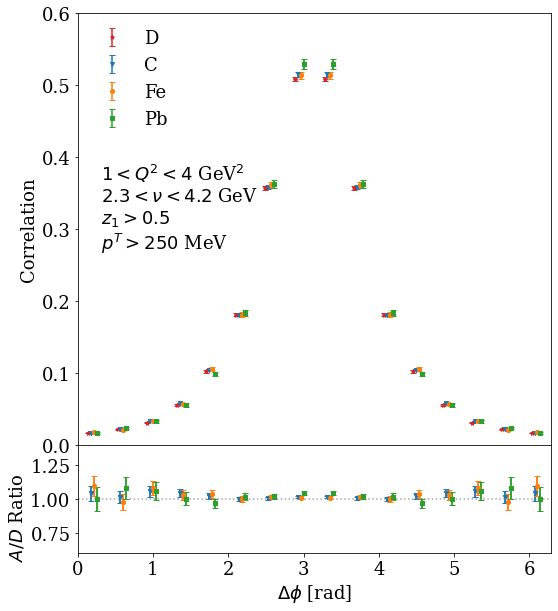

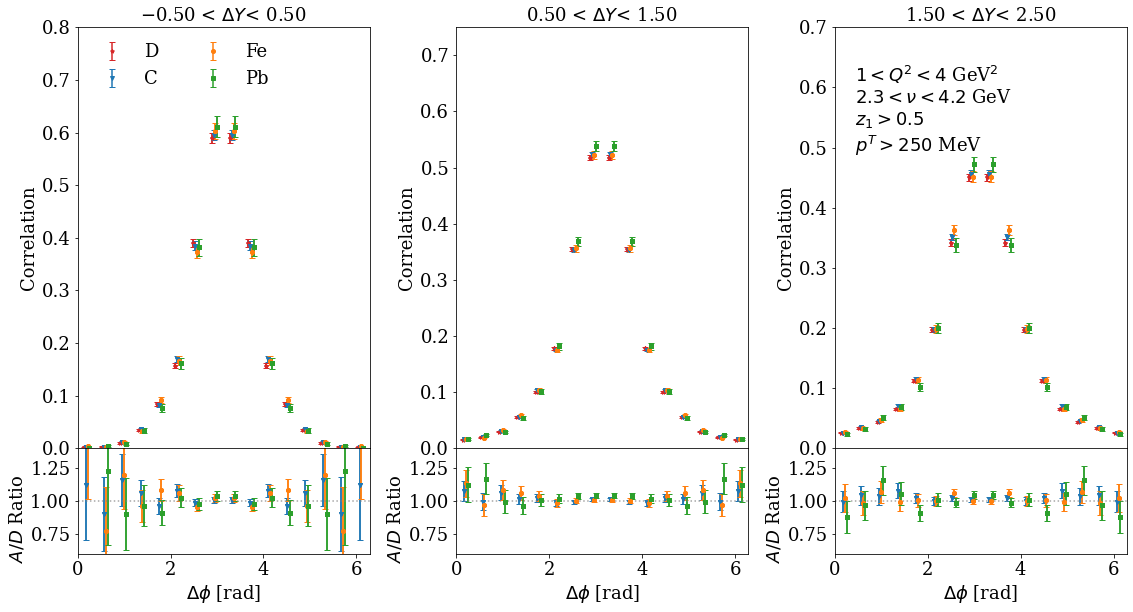

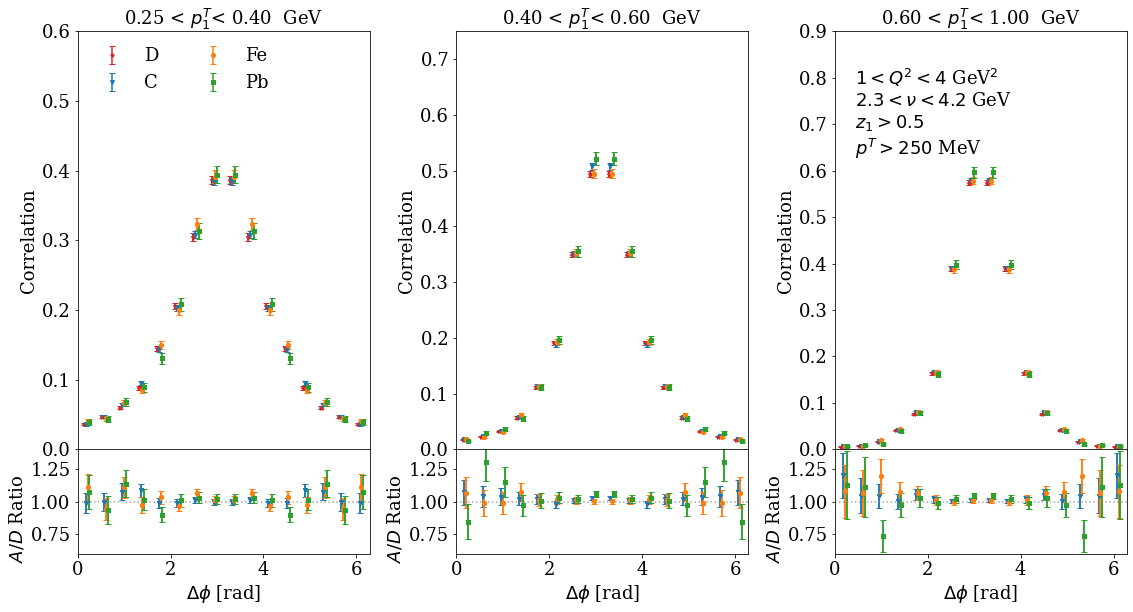

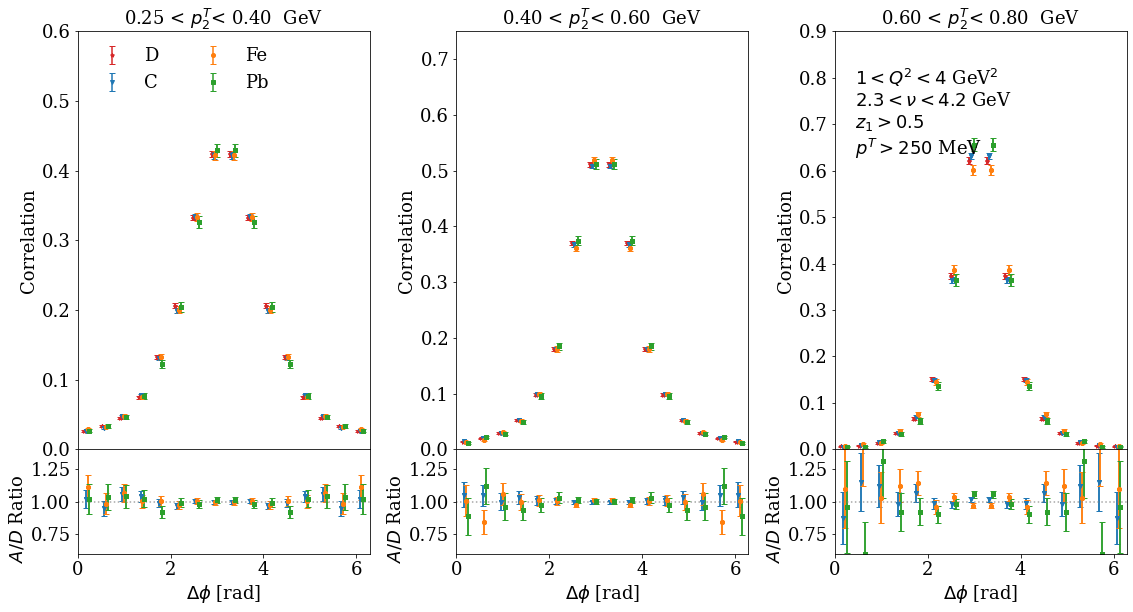

In [75]:
data, sliceinfo = get_values(None)
make_plots_new(data, sliceinfo, filename_tag="all")

data, sliceinfo = get_values("drap", "\Delta Y", (-0.5, 0.5,1.5, 2.5))
make_plots_new(data, sliceinfo, filename_tag="dY")

data, sliceinfo = get_values("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),sliceNh=True)
make_plots_new(data, sliceinfo, filename_tag="pT1", slice_unit=" GeV")

data, sliceinfo = get_values("h2_cm_pt", "p^T_{2}", (0.25, 0.4, 0.6, 0.8),sliceNh=True)
make_plots_new(data, sliceinfo, filename_tag="pT2", slice_unit=" GeV")


# Efficiency study

In [31]:
for df in dfs_pair[f'MC_{A}']:
    df['h2_truth_p']= np.sqrt()

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1

(array([  806.,   892.,  1226.,  1748.,  2599.,  4144.,  6661., 10565.,
        16536., 20981.]),
 array([4.47440465e-04, 3.14561865e-01, 6.28676290e-01, 9.42790715e-01,
        1.25690514e+00, 1.57101956e+00, 1.88513399e+00, 2.19924841e+00,
        2.51336284e+00, 2.82747726e+00, 3.14159169e+00]),
 <BarContainer object of 10 artists>)

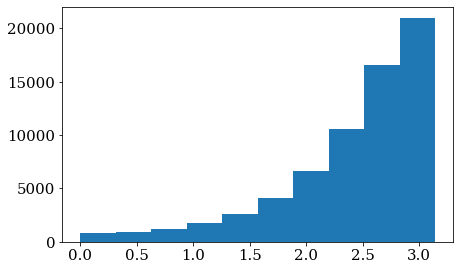

Entries before cut  83176
Q2>1.0 and Q2<4.0 83176  (100.00  %)
0.2<h1_p<5.0  83176  (100.00  %)
inelasticity < 0.85 83176  (100.00  %)
h1_pid = pions (trigger) 83176  (100.00  %)
2.2 < nu <4.2 83176  (100.00  %)
10< h1_th 83176  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83176  (100.00  %)
Nom cuts for the trigger applied 69252  (83.26  %)
rms= 0.029992936366674616 chi2= 53.171265879613145
Entries before cut  83176
Q2>1.0 and Q2<4.0 83176  (100.00  %)
0.2<h1_p<5.0  83176  (100.00  %)
inelasticity < 0.85 83176  (100.00  %)
h1_pid = pions (trigger) 83176  (100.00  %)
2.2 < nu <4.2 83176  (100.00  %)
10< h1_th 83176  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83176  (100.00  %)
Nom cuts for the trigger applied 69252  (83.26  %)
rms= 0.03271827252091659 chi2= 57.934076193329126


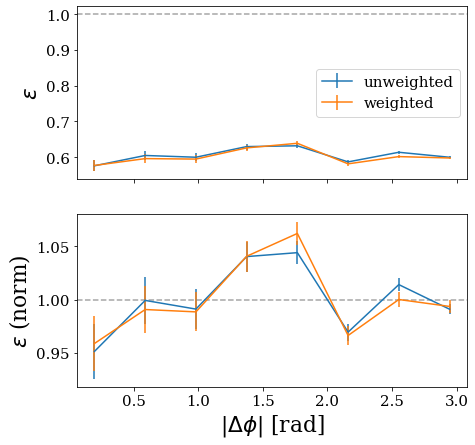

In [114]:
fig, axs = plt.subplots(2,1, figsize=(7,7), sharex='all')
for weighted in False, True:
    

    for A in "D".split():
        df = dfs_mc[f'{A}']
        cuts = "h1_cm_pt>0.25 and h2_truth_cm_pt>0.25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.35"
        cuts += " and h1_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_pid==211 and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
        cuts += " and ((h2_truth_th>25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.7) or (sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        #cuts='h1_cm_pt>0'
        df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)
        #othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"
        #df = df.query(othercuts)
        denom,x = np.histogram(df.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=df.weight_truth if weighted else None)
        dfpass = df.query("h2_pid==-211 and h2_z>0 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and (h1_p+h2_p)/nu<1.")
        num,x = np.histogram(dfpass.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        axs[0].errorbar(x,eff, deff,label=("weighted" if weighted else "unweighted"))
        axs[1].errorbar(x,y, dy)
axs[0].axhline(1, color='0.5', alpha=0.7, linestyle='--')
axs[1].axhline(1, color='0.5', alpha=0.7, linestyle='--')
axs[1].set_xlabel("$|\\Delta\\phi|$ [rad]")
axs[0].legend()
axs[0].set_ylabel("$\\epsilon$")
axs[1].set_ylabel("$\\epsilon$ (norm)")
plt.show()

Entries before cut  72175
Q2>1.0 and Q2<4.0 72175  (100.00  %)
0.2<h1_p<5.0  72175  (100.00  %)
inelasticity < 0.85 72175  (100.00  %)
h1_pid = pions (trigger) 72175  (100.00  %)
2.2 < nu <4.2 72175  (100.00  %)
10< h1_th 72175  (100.00  %)
Theta/P fiducial region selected for trigger hadron 72175  (100.00  %)
Nom cuts for the trigger applied 72175  (100.00  %)


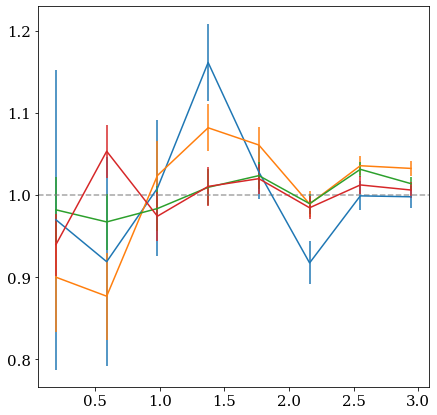

In [47]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
for A in "D".split():
    df = dfs_mc[f'MC_{A}']
    cuts = "h1_cm_pt>0.25 and h2_truth_cm_pt>0.25 and sqrt((nu*h2_truth_z)**2-.1396**2)>0.35"
    cuts += " and h1_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
    cuts += " and h1_pid==211 and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
    cuts += " and ((h2_truth_th*180/pi>25 and sqrt((nu*h2_truth_z)**2-.1396**2)>0.7) or (sqrt((nu*h2_truth_z)**2-.1396**2)>0.5 & h2_truth_th*180/pi>30) or (h2_truth_th*180/pi>40))"
    
    df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)
    
    for i in range(4):
        dfq = df.query(f"drap_truth>{i*.5} and drap_truth<{(i+1)*.5}")
        denom,x = np.histogram(dfq.eval("dphi_truth"), bins=np.linspace(0, np.pi, 9))
        num,x = np.histogram(dfq.query("h2_z>0").eval("dphi_truth"), bins=np.linspace(0, np.pi, 9))
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        plt.errorbar(x,y, dy)
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')